In [1]:
import sys
sys.path.append('..')
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy  as np
import gc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_preprocessing_utils import Utils

from mne.io import read_raw_edf, concatenate_raws
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.epochs import Epochs
import mne

%matplotlib ipympl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data_path = "C:/Users/Maods/Documents/Code-Samples/Python/MI-EEG-Dataset/dataset/original/S001/S001R04.edf"

In [3]:
raw_run = read_raw_edf(data_path, preload=True) 

Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [4]:
raw_run

<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

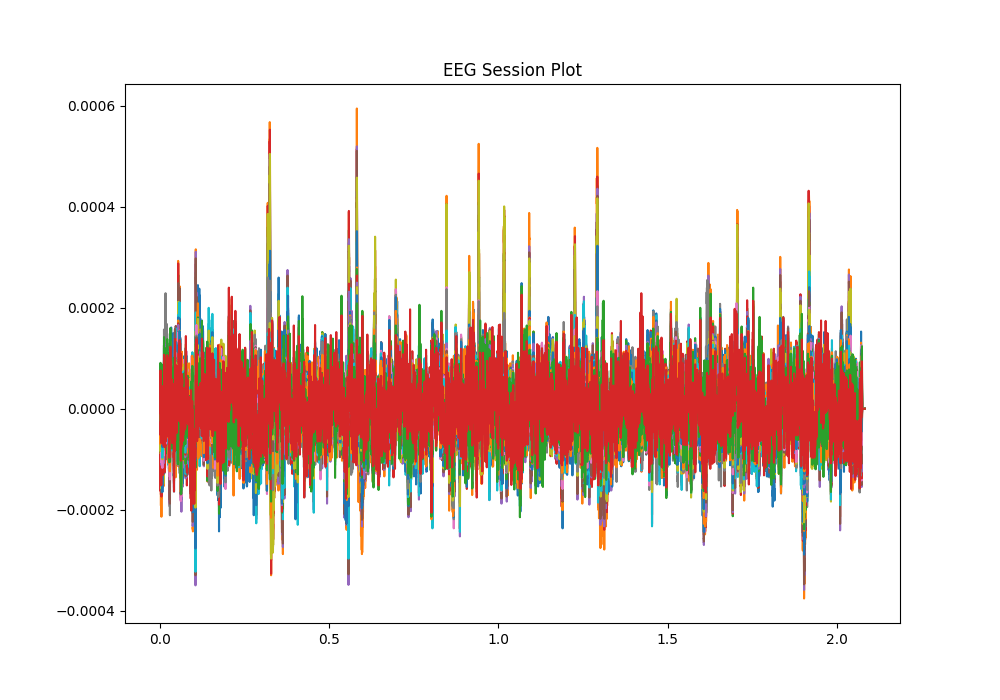

In [5]:
x_sample = raw_run.get_data()[1]
n_points = len(raw_run.get_data()[0])
minutes = (n_points / 160 ) / 60

plt.figure(figsize=(10,7))
for i in range(raw_run.get_data().shape[0]):
    sns.lineplot(x=np.linspace(0,minutes,n_points), y=raw_run.get_data()[i]).set_title("EEG Session Plot");

In [6]:
raw_run.annotations.description

array(['T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0',
       'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1',
       'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1'], dtype='<U2')

In [7]:
print(raw_run.annotations.duration)

[4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1]


In [8]:
np.sum(raw_run._annotations.duration)

124.49999999999999

In [9]:
raw_run.crop(tmax=124) 
np.sum(raw_run._annotations.duration)

124.00625

In [10]:
raw_run.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 529 samples (3.306 sec)



<RawEDF | S001R04.edf, 64 x 19841 (124.0 s), ~9.8 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


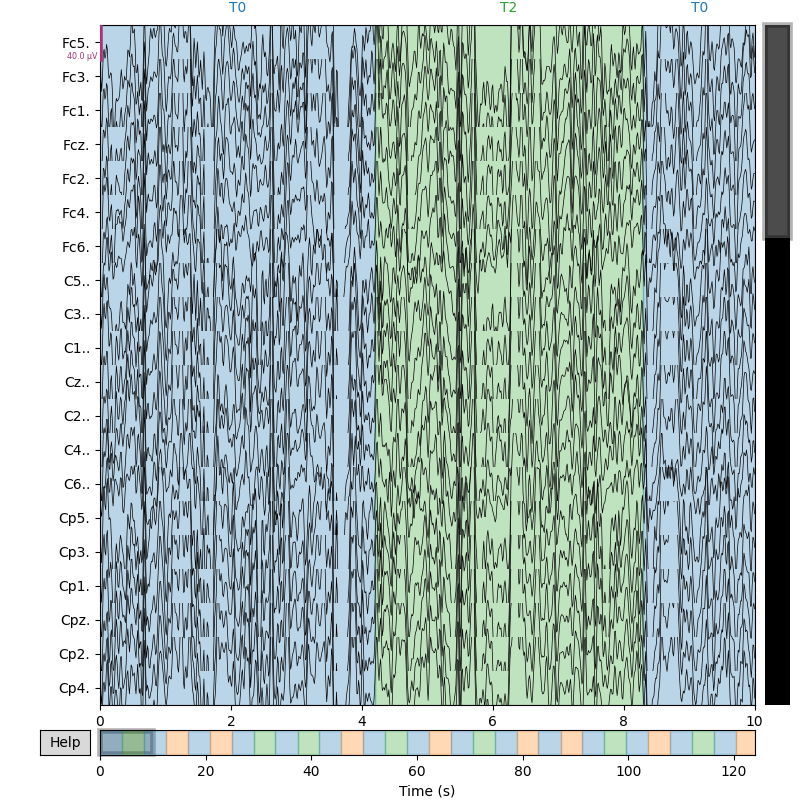

In [11]:
raw_run.plot();

In [12]:
data_path = "C:/Users/Maods/Documents/Code-Samples/Python/MI-EEG-Dataset/dataset/original/"
runs = [4, 6, 8, 10, 12, 14]
subjects = [1]
raw_subj_one = Utils.load_data(subjects, runs, data_path)

Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.

In [13]:
raw_subj_one = concatenate_raws(raw_subj_one[0])

In [14]:
raw_subj_one._annotations.description

array(['B', 'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B',
       'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'L',
       'B', 'R', 'B', 'L', 'BAD boundary', 'EDGE boundary', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'LR', 'B', 'F', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B', 'LR', 'B', 'LR', 'B',
       'F', 'B', 'F', 'BAD boundary', 'EDGE boundary', 'B', 'L', 'B', 'R',
       'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'B',
       'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B', 'L',
       'BAD boundary', 'EDGE boundary', 'B', 'LR', 'B', 'F', 'B', 'F',
       'B', 'LR', 'B', 'F', 'B', 'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B', 'LR', 'B', 'F',
       'BAD boundary', 'EDGE boundary', 'B', 'R', 'B', 'L', 'B', 'R', 'B',
       'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B', 'L', 'B', 'R',
       'B', 'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'BAD b

In [53]:
raw_subj_one.ch_names[12]

'C4..'

In [16]:
run = raw_run.copy()

eegbci.standardize(run)  # Cambio n_epoch nomi dei canali
montage = make_standard_montage('standard_1005')  # Caricare il montaggio
run.set_montage(montage)

<RawEDF | S001R04.edf, 64 x 19841 (124.0 s), ~9.8 MB, data loaded>

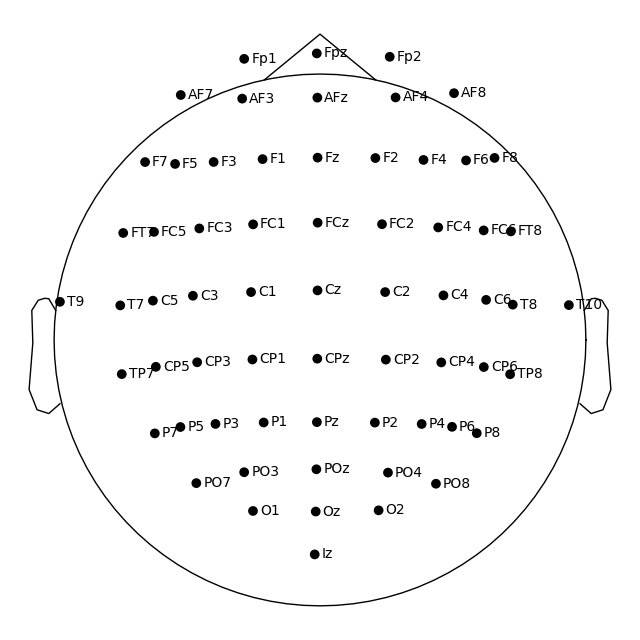

In [17]:
run.plot_sensors(show_names=True);

In [18]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [19]:
ica.fit(run.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 265 samples (1.656 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.8s.


<ICA | raw data decomposition, method: fastica (fit in 82 iterations on 19841 samples), 20 ICA components explaining 98.9 % of variance (64 PCA components available), channel types: eeg, no sources marked for exclusion>

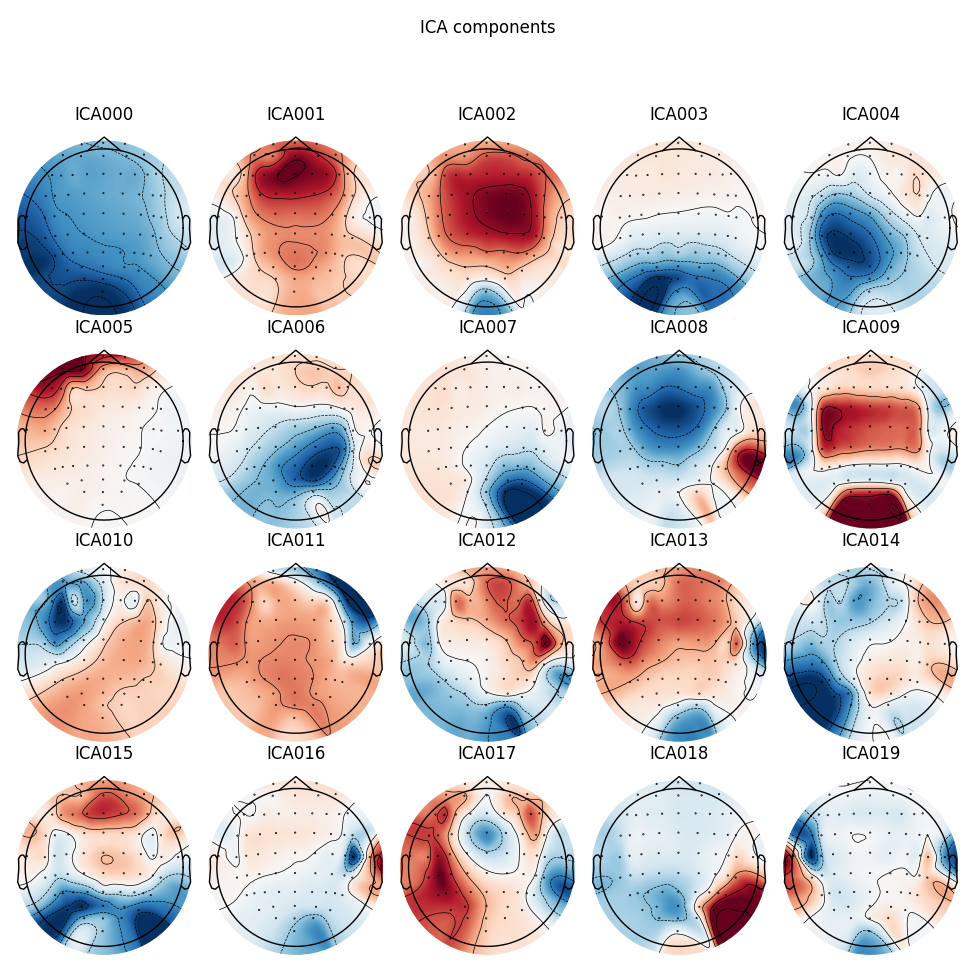

In [20]:
ica.plot_components();

## Epochs

In [21]:
events = mne.events_from_annotations(raw_subj_one)

Used Annotations descriptions: ['B', 'F', 'L', 'LR', 'R']


In [22]:
events

(array([[     0,      0,      1],
        [   672,      0,      5],
        [  1328,      0,      1],
        [  2000,      0,      3],
        [  2656,      0,      1],
        [  3328,      0,      3],
        [  3984,      0,      1],
        [  4656,      0,      5],
        [  5312,      0,      1],
        [  5984,      0,      5],
        [  6640,      0,      1],
        [  7312,      0,      3],
        [  7968,      0,      1],
        [  8640,      0,      5],
        [  9296,      0,      1],
        [  9968,      0,      3],
        [ 10624,      0,      1],
        [ 11296,      0,      5],
        [ 11952,      0,      1],
        [ 12624,      0,      3],
        [ 13280,      0,      1],
        [ 13952,      0,      3],
        [ 14608,      0,      1],
        [ 15280,      0,      5],
        [ 15936,      0,      1],
        [ 16608,      0,      3],
        [ 17264,      0,      1],
        [ 17936,      0,      5],
        [ 18592,      0,      1],
        [ 1926

In [23]:
events_id = events[1]
epochs =  mne.Epochs(raw_subj_one, events[0], event_id=events_id)

Not setting metadata
180 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 180 events and 113 original time points ...
6 bad epochs dropped
Opening epochs-browser...
Using data from preloaded Raw for 20 events and 113 original time points ...


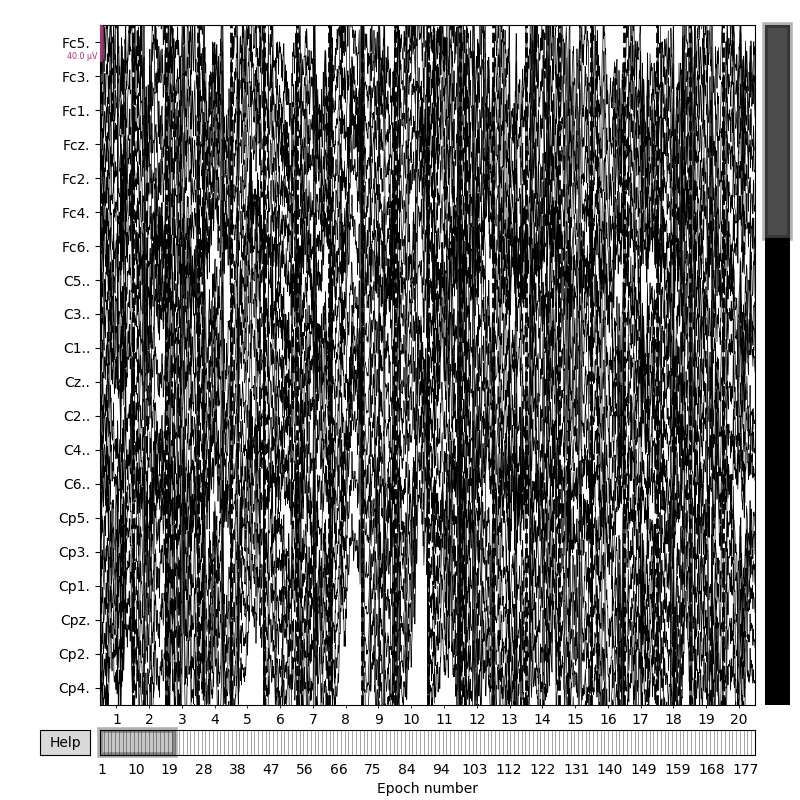

In [24]:
epochs.plot();

In [25]:
events_id

{'B': 1, 'F': 2, 'L': 3, 'LR': 4, 'R': 5}

Using data from preloaded Raw for 24 events and 113 original time points ...
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\Maods\AppData\Local\Temp\ipykernel_3712\2189435250.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs["F"].plot_image(picks=[12]);


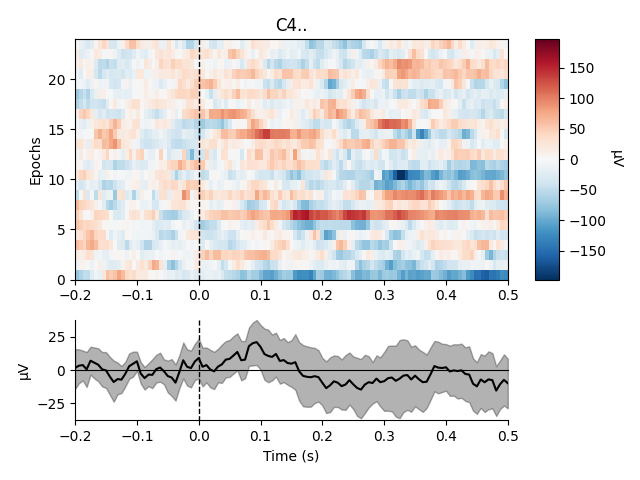

In [54]:
epochs["F"].plot_image(picks=[12]);

Using data from preloaded Raw for 23 events and 113 original time points ...
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\Maods\AppData\Local\Temp\ipykernel_3712\185639809.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs["L"].plot_image(picks=[12]);


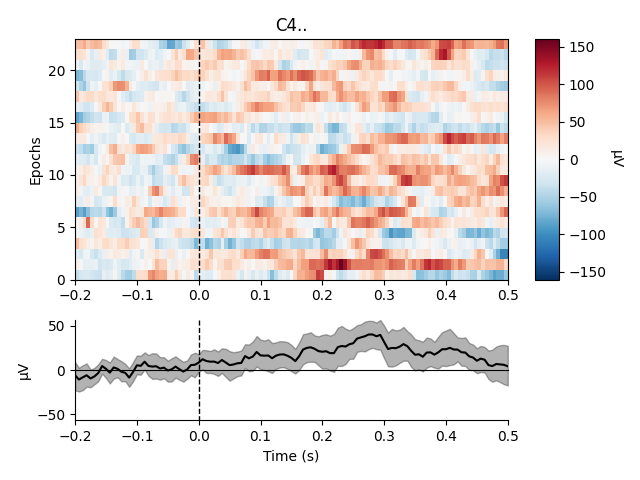

In [55]:
epochs["L"].plot_image(picks=[12]);

In [28]:
{'B': 1, 'F': 2, 'L': 3, 'LR': 4, 'R': 5}

baseline = epochs["B"].average()
fist = epochs["F"].average()
left = epochs["L"].average()
left_right = epochs["LR"].average()
right = epochs["R"].average()

In [29]:
baseline

<Evoked | 'B' (average, N=84), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 64 ch, ~121 kB>

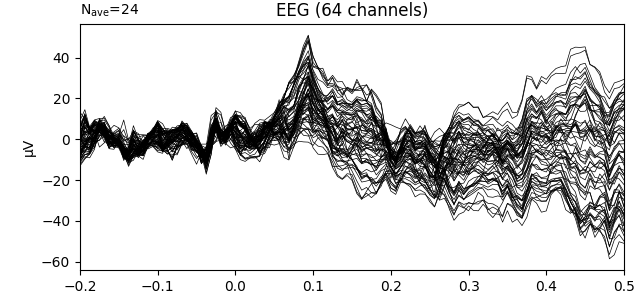

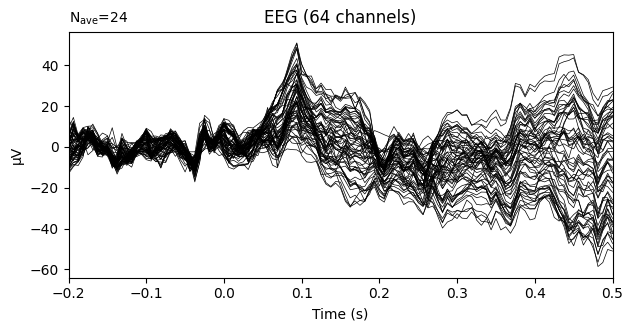

In [30]:
fist.plot()

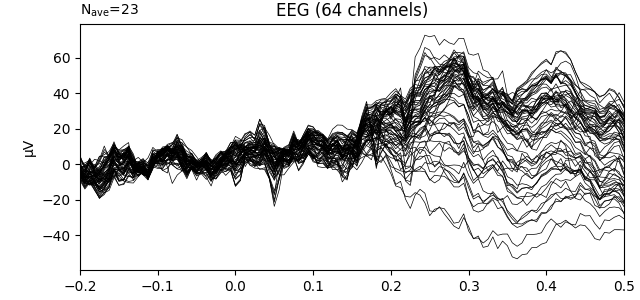

In [31]:
left.plot();

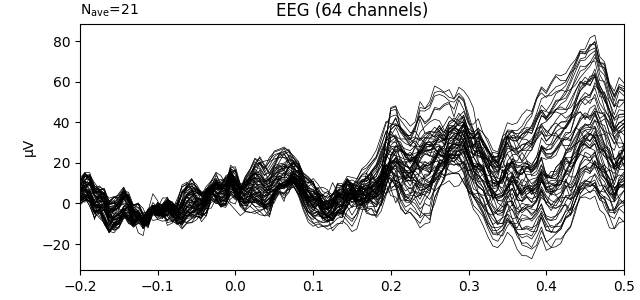

In [32]:
left_right.plot();

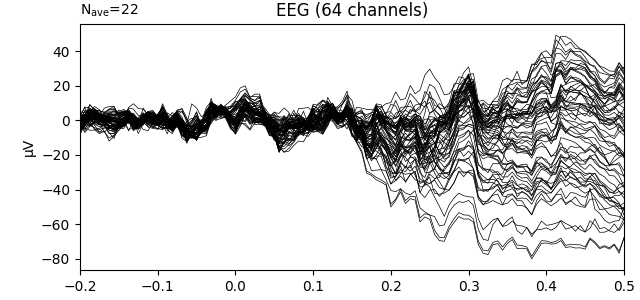

In [33]:
right.plot();

Effective window size : 12.800 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Maods\AppData\Local\Temp\ipykernel_3712\791431569.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_subj_one.plot_psd(picks=[12]);


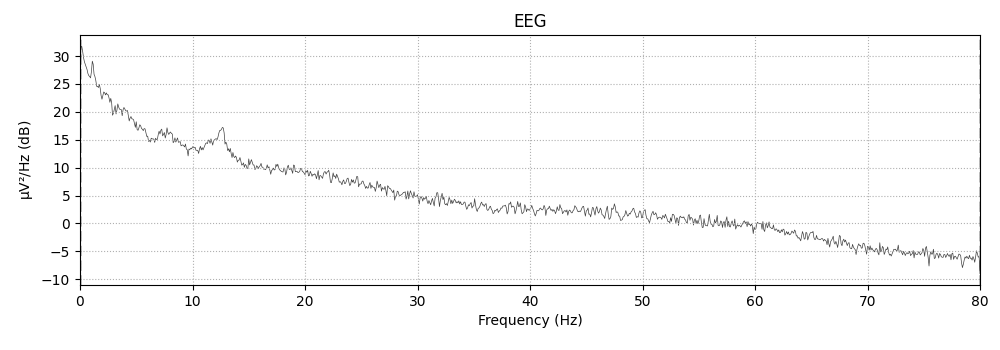

In [57]:
raw_subj_one.plot_psd(picks=[12]);

C:\Users\Maods\AppData\Local\Temp\ipykernel_3712\1650537254.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds({


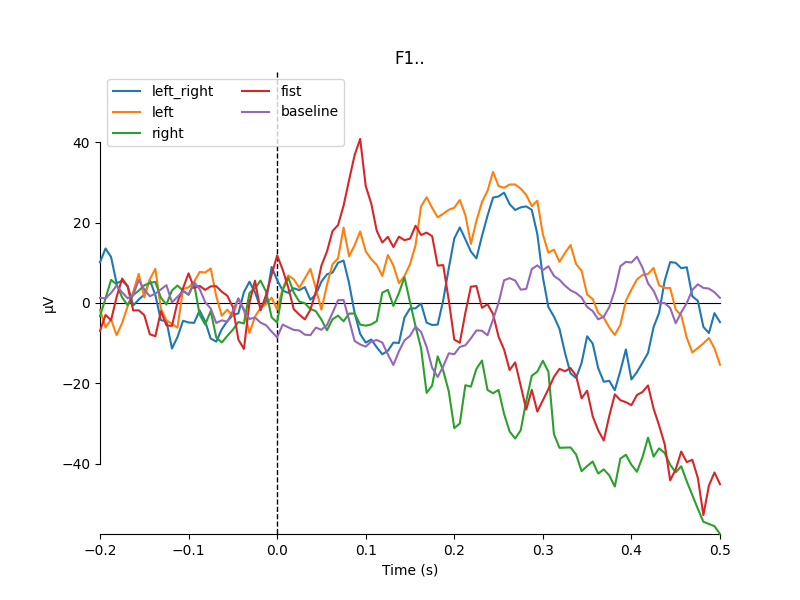

In [35]:
mne.viz.plot_compare_evokeds({
    "left_right": left_right,
    "left": left,
    "right": right,
    "fist": fist,
    "baseline": baseline,
}, picks=[32]);

In [36]:
from mne.time_frequency import tfr_morlet

In [37]:


freqs = list(range(7,30))
tf_left = tfr_morlet(epochs["L"], freqs, 3, return_itc=False)
tf_right = tfr_morlet(epochs["R"], freqs, 3, return_itc=False)

Using data from preloaded Raw for 23 events and 113 original time points ...
Using data from preloaded Raw for 22 events and 113 original time points ...


No baseline correction applied


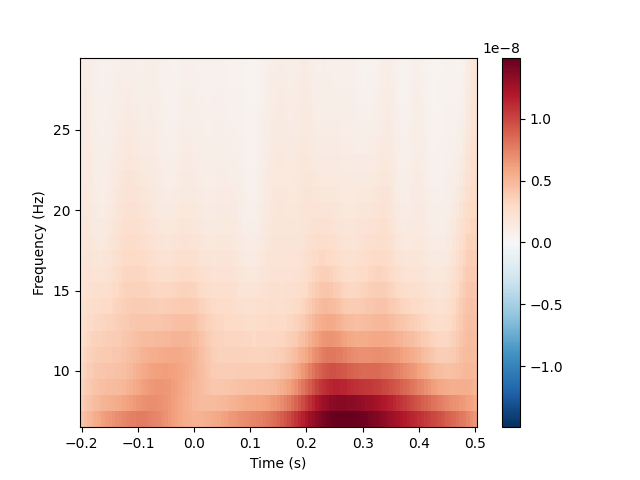

In [60]:
tf_left.plot(picks=[12]);

No baseline correction applied


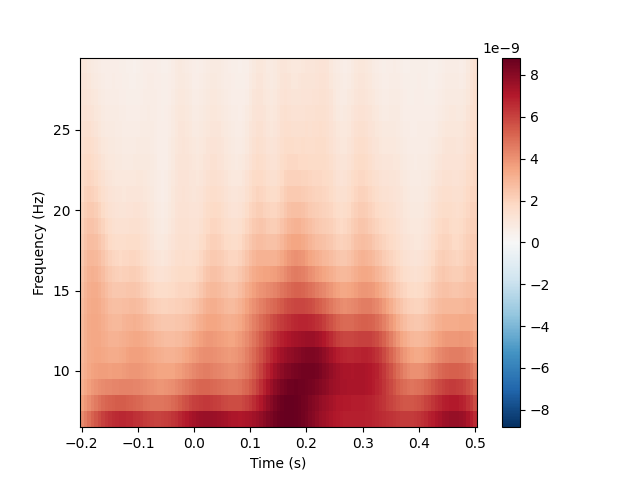

In [61]:
tf_right.plot(picks=[12]);